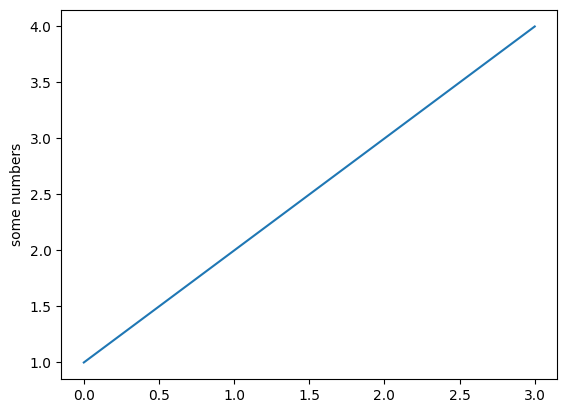

In [4]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])
plt.ylabel("some numbers")
plt.show()

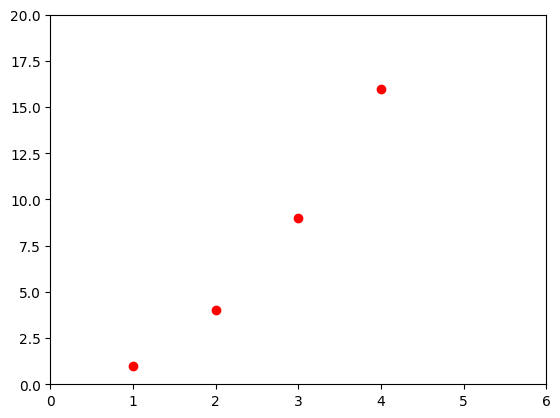

In [12]:
plt.plot([1,2,3,4], [1,4,9,16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

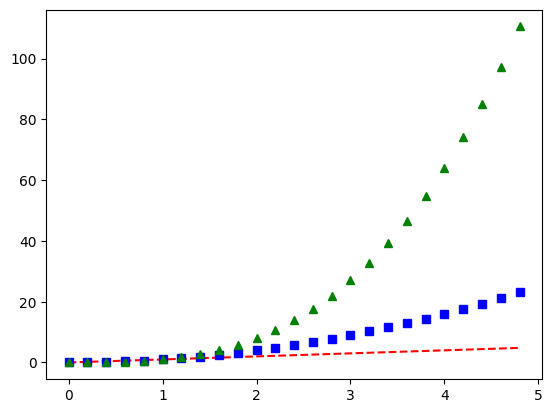

In [14]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0, 5, 0.2)

plt.plot(t, t, "r--", t, t**2, "bs", t, t**3, "g^")
plt.show()

## 控制线条属性

* 使用关键字参数
  
  plt.plot(x, y, linewidth=2.0)
  
* 使用Line2D实例的setter方法

  line, = plt.plot(x, y, '-')
  line.set_antialiased(False) # turn off antialising

* 用setp()命令

  lines = plt.plot(x1, y1, x2, y2)
  # 使用关键字参数  
  plt.setp(lines, color='r', linewidth=2.0)
  # 或者 MATLAB 风格的字符串值对  
  plt.setp(lines, 'color', 'r', 'linewidth', 2.0)  

要获取可设置的线条属性的列表，请以一个或多个线条作为参数调用step()函数

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `~matplotlib.figure.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gapcolor: color or None
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker st

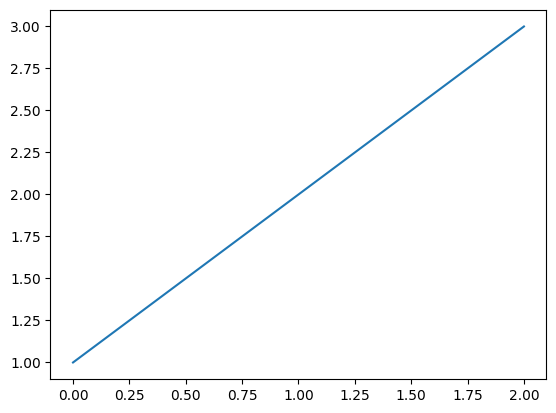

In [18]:
lines = plt.plot([1,2,3])
plt.setp(lines)

## 处理多个图形和轴域

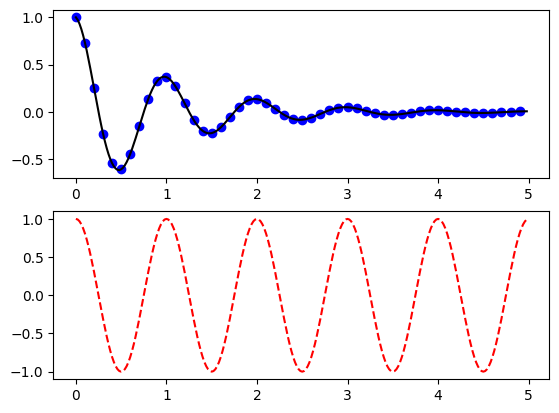

In [19]:
def f(t):
    return np.exp(-t)*np.cos(2*np.pi*t)

t1=np.arange(0,5,0.1)
t2=np.arange(0,5,0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), "bo", t2, f(t2), "k")

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

`subplot()`命令指定`numrows`，`numcols`，`fignum`，其中fignum的范围是从`1`到`numrows * numcols`

## 处理文本

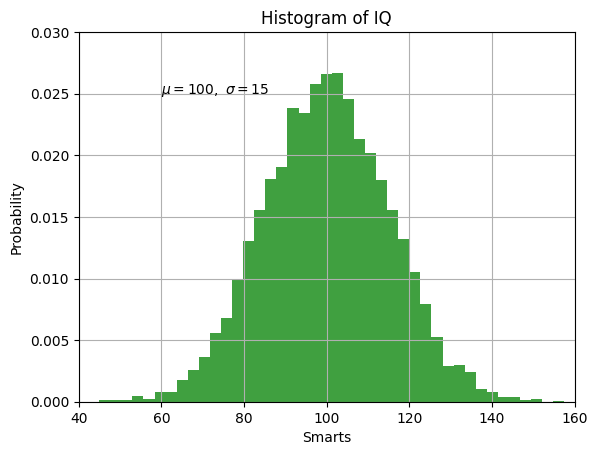

In [26]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# 数据的直方图
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

## 标注文本

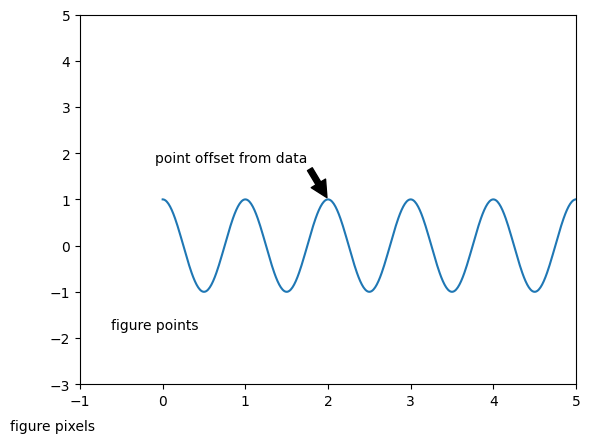

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-1, 5), ylim=(-3, 5))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = ax.plot(t, s)

ax.annotate('figure pixels',
            xy=(10,10), xycoords='figure pixels')
ax.annotate('figure points',
            xy=(80, 80), xycoords='figure points')
ax.annotate('point offset from data',
            xy=(2, 1), xycoords='data',
            xytext=(-15, 25), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')

plt.show()

## 对数和其它非线性轴

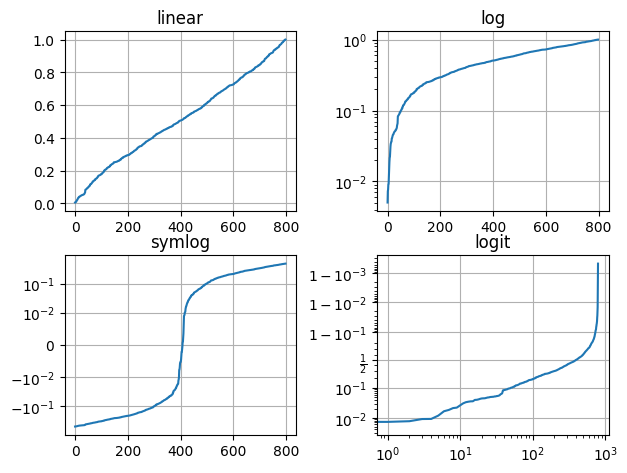

In [45]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# 生成一些区间 [0, 1] 内的数据
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# 带有多个轴域刻度的 plot
plt.figure(1)

# 线性
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

# 对数
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)


# 对称的对数
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthresh=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.xscale('log')